# PyBORACS - Python Borehole Acoustic Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, Video
from pyboracs import borehole_ac2d, velmodel, animate

plt.rcParams["font.size"] = 20

In [2]:
# Input
nx = 200  # grid points in x
nz = 200  # grid points in z
nt = 2850  # number of time steps
dx = 10  # grid increment in x
dt = 0.0006  # Time step
c0 = 3000  # velocity (can be an array)
isx = nx // 2  # source index x
isz = nz // 2  # source index z
ist = 100  # shifting of source time function
f0 = 100  # dominant frequency of source (Hz)
isnap = 10  # snapshot frequency

# Receiver locations
irx = np.array([100, 100, 100, 100, 100, 100, 100, 100])
irz = np.array([10, 15, 20, 25, 30, 35, 40, 45])

## Homogeneous model (no borehole)

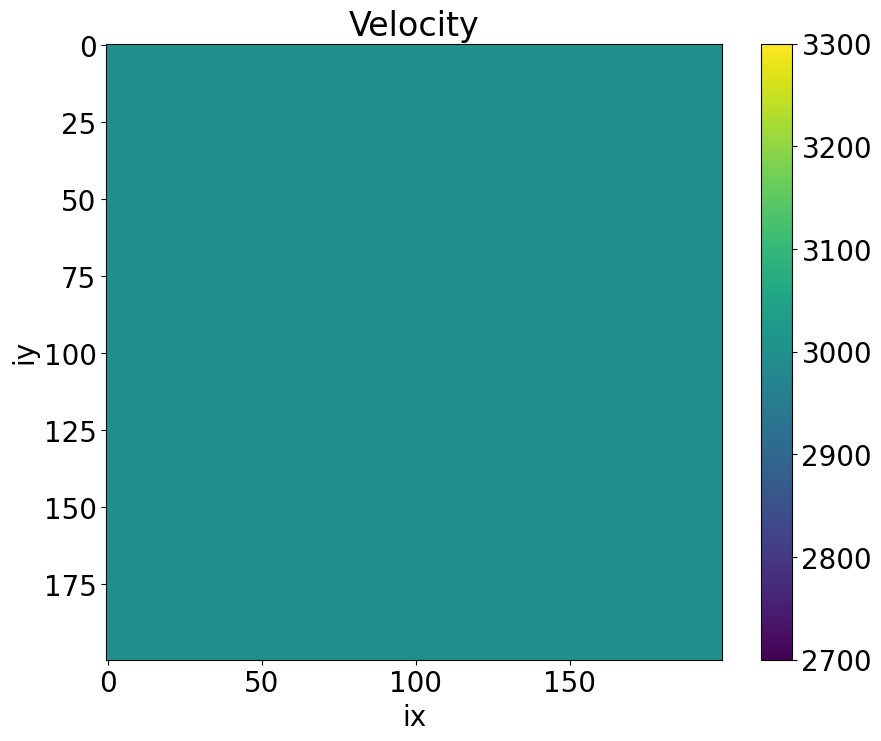

In [3]:
# Formation model
c0 = 3000
model = velmodel(nx, nz)
model.homogeneous(c0)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set(title="Velocity", xlabel="ix", ylabel="iy")
im = ax.imshow(model.vel)
fig.colorbar(im)

In [4]:
pnew, seis = borehole_ac2d(model.vel, nx, nz, nt, dx, dt, isx, isz, irx, irz, ist, f0)

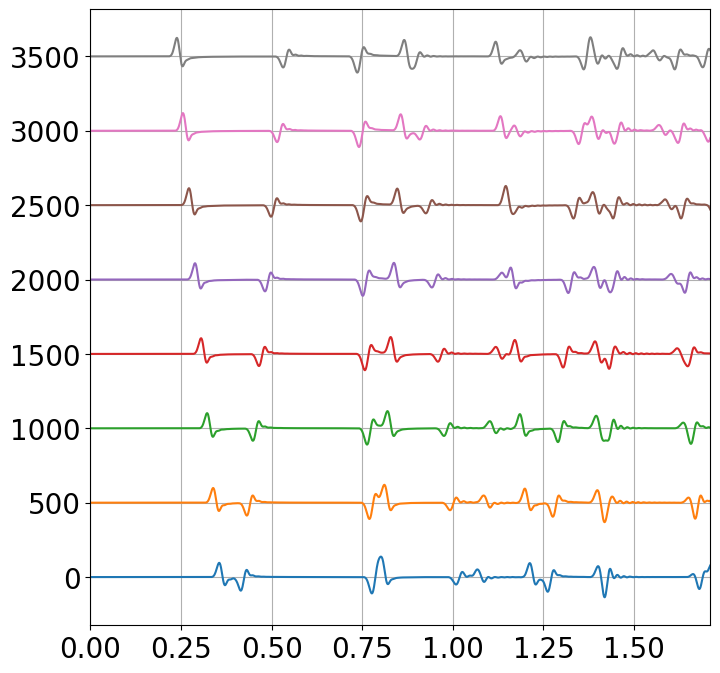

In [5]:
t = np.linspace(0, nt * dt, nt)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(xlim=(0, nt * dt))
ax.grid()

for i in range(len(seis)):
    ax.plot(t, seis[i] + i * 500)

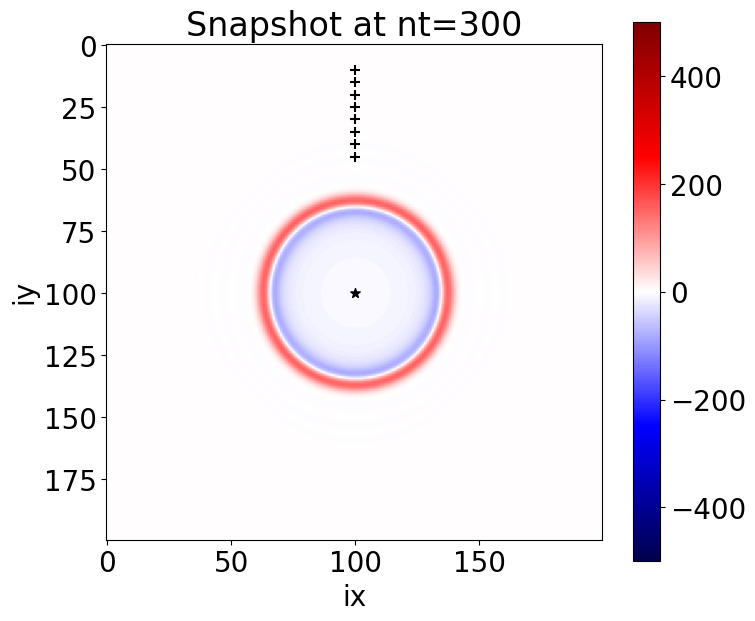

In [6]:
# Make snapshot
timestep = 300

fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.set(title=f"Snapshot at nt={timestep}", xlabel="ix", ylabel="iy")

im = ax.imshow(pnew[timestep - 1], vmin=-500, vmax=500, cmap="seismic")
fig.colorbar(im)

ax.scatter(irx, irz, marker="+", color="black", s=50)
ax.scatter(isx, isz, marker="*", color="black", s=50)

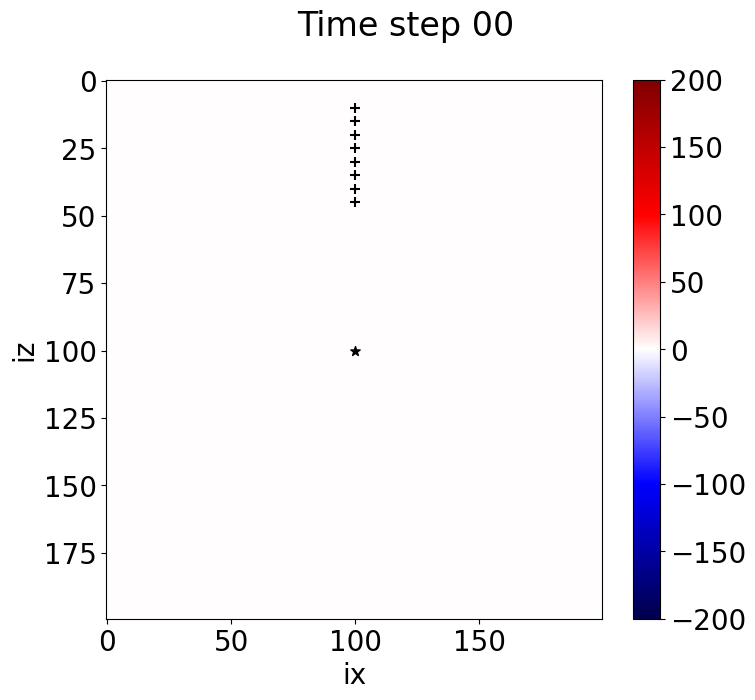

In [7]:
anim = animate(pnew, nx, nz, isx, isz, irx, irz, nt=nt, interval=100)
anim.save("no_borehole.mp4")
Video("no_borehole.mp4")

## Open hole with mudcake and invaded zone

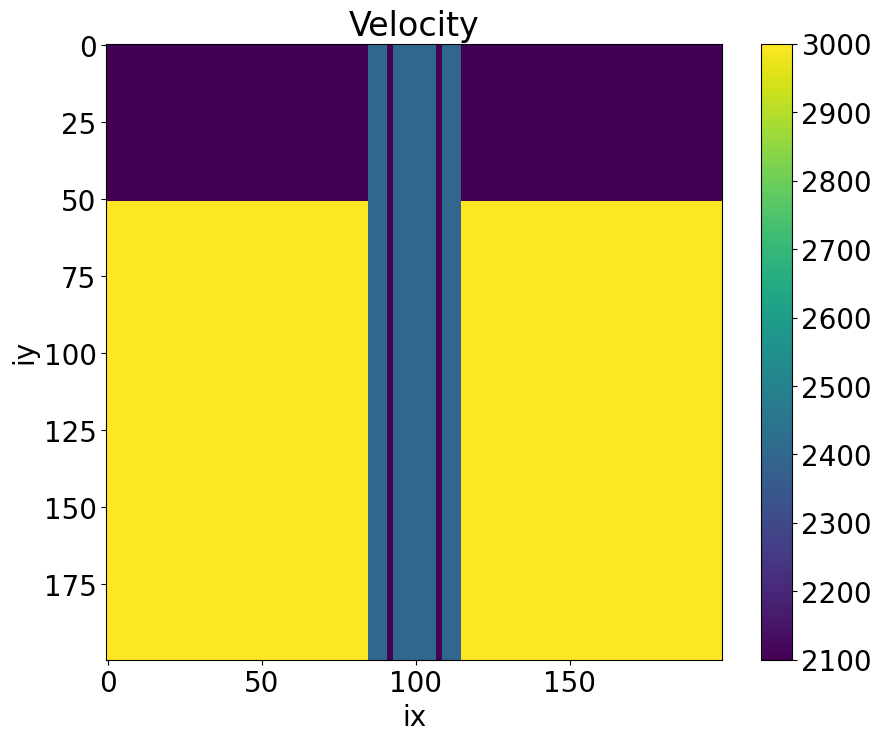

In [8]:
# Formation model
c0 = 3000
model = velmodel(nx, nz)
model.homogeneous(c0)

# Water level
model.owc(c_oilsat=0.7 * c0, location=51)

# Casedhole model
model.invadedzone(c_invade=0.8 * c0)
model.mud(c_mud=0.7 * c0)
# model.casing(c_casing=2*c0)
model.openhole(c_drfl=0.8 * c0)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set(title="Velocity", xlabel="ix", ylabel="iy")

im = ax.imshow(model.vel)
fig.colorbar(im)

In [9]:
pnew, seis = borehole_ac2d(model.vel, nx, nz, nt, dx, dt, isx, isz, irx, irz, ist, f0)

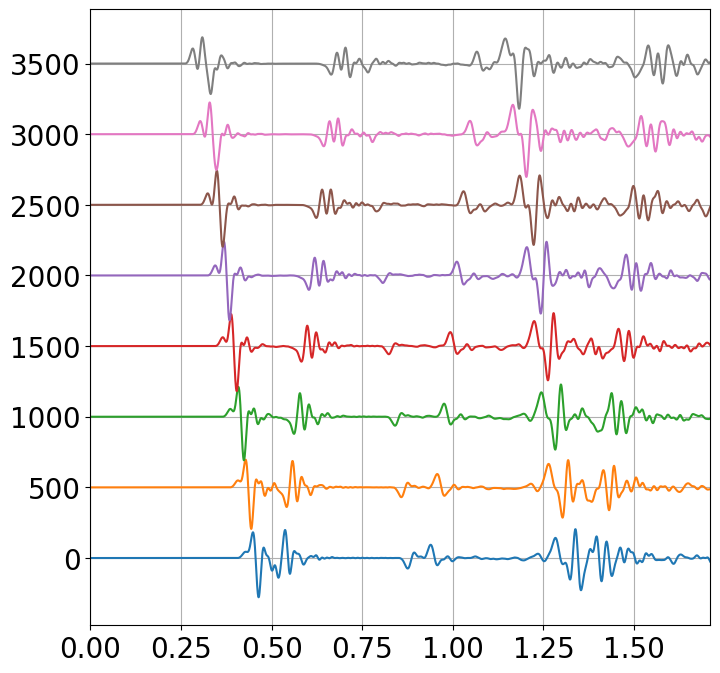

In [10]:
t = np.linspace(0, nt * dt, nt)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(xlim=(0, nt * dt))
ax.grid()

for i in range(len(seis)):
    ax.plot(t, seis[i] + i * 500)

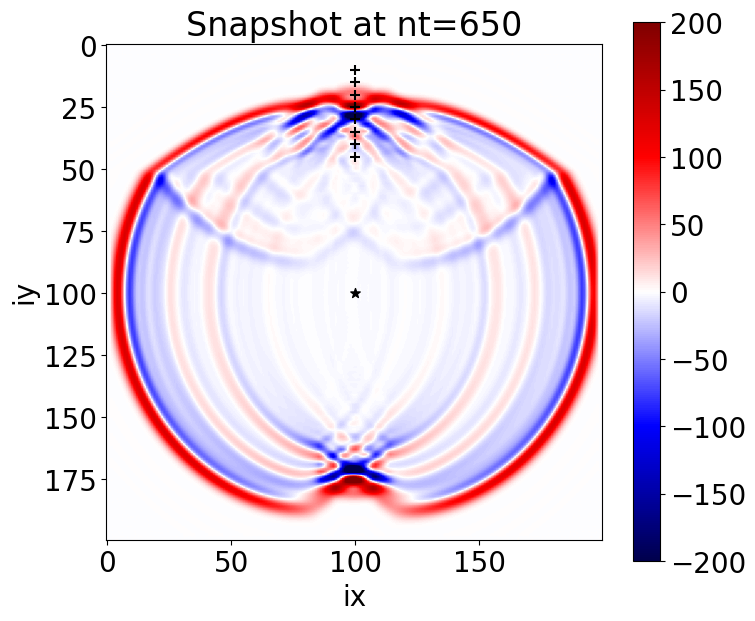

In [11]:
# Make snapshot
timestep = 650

fig, ax = plt.subplots(1, 1, figsize=(8, 7))
im = plt.imshow(pnew[timestep - 1], vmin=-200, vmax=200, cmap="seismic")
fig.colorbar(im)

ax.set(title=f"Snapshot at nt={timestep}", xlabel="ix", ylabel="iy")

ax.scatter(irx, irz, marker="+", color="black", s=50)
ax.scatter(isx, isz, marker="*", color="black", s=50)

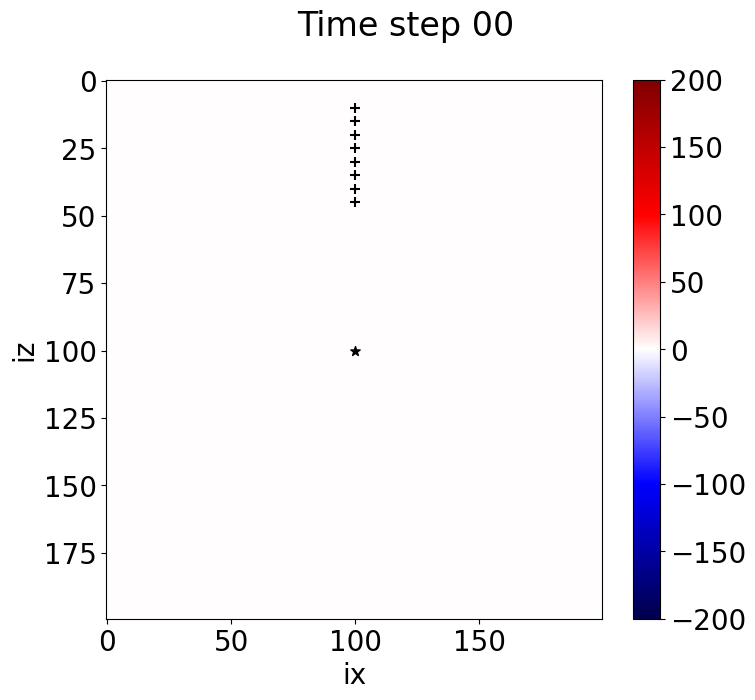

In [12]:
anim = animate(pnew, nx, nz, isx, isz, irx, irz, nt=nt, interval=100)
anim.save("oh_mud_inv.mp4")
Video("oh_mud_inv.mp4")

## Cased hole with washouts, fractured, shale lamination, and oil-water contact

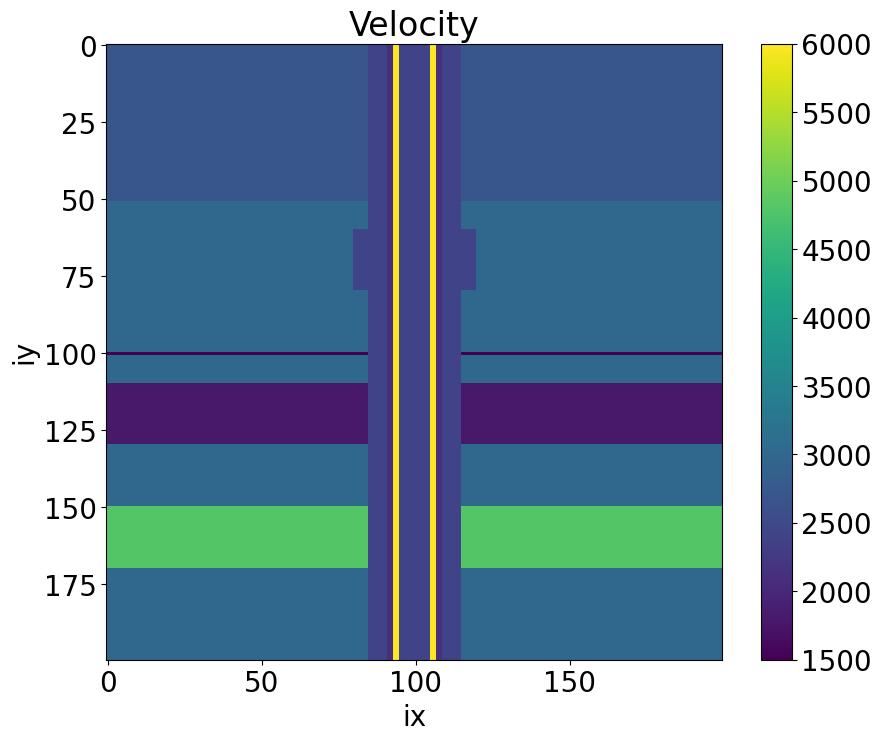

In [13]:
# Formation model
c0 = 3000
model = velmodel(nx, nz)
model.homogeneous(c0)
model.fracture(c_lowvel=0.5*c0, location=100)
model.laminae(c_laminae=0.6*c0, location=110, thickness=20) # Shale laminae
model.laminae(c_laminae=1.6*c0, location=150, thickness=20) # Shale laminae

# Water level
model.owc(c_oilsat=0.9*c0, location=51)

# Casedhole model
model.invadedzone(c_invade=0.8*c0)
model.mud(c_mud=0.7*c0)
model.casing(c_casing=2*c0)
model.cement(c_cement=0.8*c0)
model.washout(c_cement=0.8*c0)

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set(title="Velocity", xlabel="ix", ylabel="iy")
im = ax.imshow(model.vel)
fig.colorbar(im)


In [14]:
pnew, seis = borehole_ac2d(model.vel, nx, nz, nt, dx, dt, isx, isz, irx, irz, ist, f0)

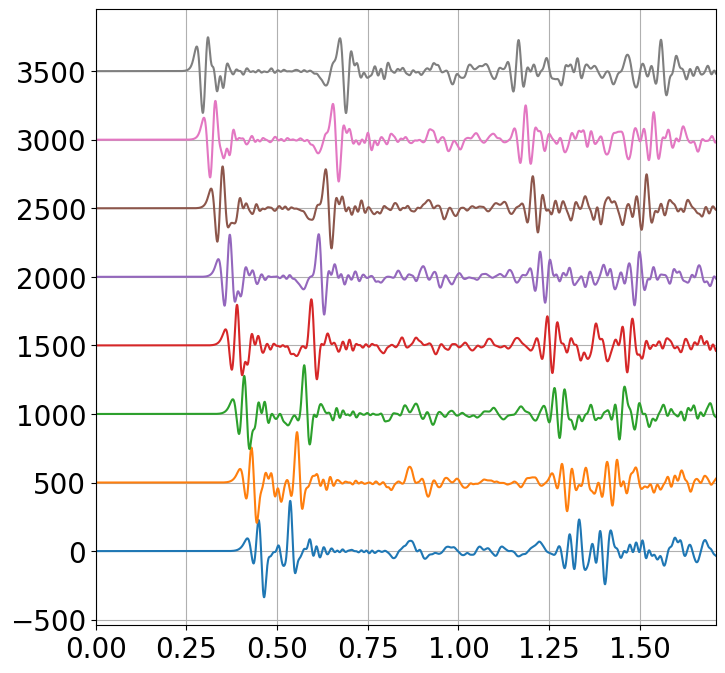

In [15]:
t = np.linspace(0,nt*dt,nt)

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set(xlim = (0,nt*dt))
ax.grid()

for i in range(len(seis)):
  ax.plot(t,seis[i]+i*500)



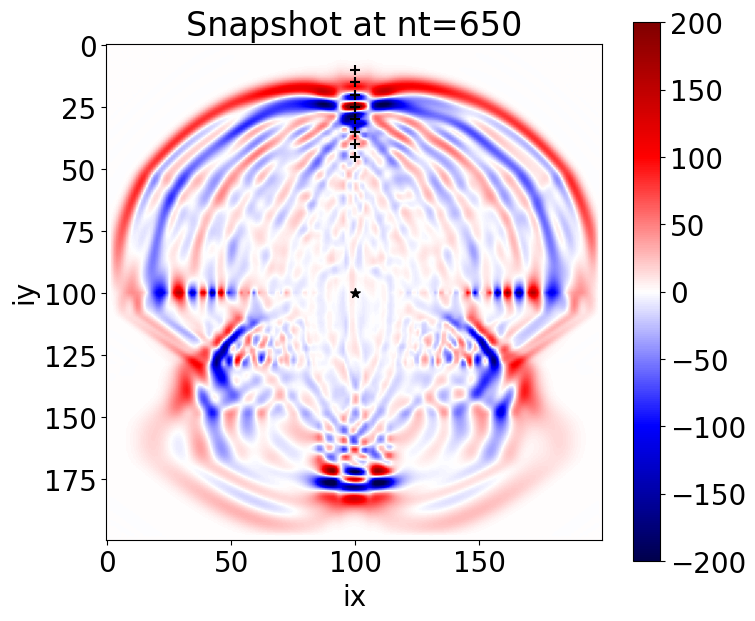

In [16]:
# Make snapshot
timestep = 650

fig, ax = plt.subplots(1, 1, figsize=(8, 7))

im = ax.imshow(pnew[timestep - 1], cmap="seismic", vmin=-200, vmax=200)
fig.colorbar(im)

ax.set(title=f"Snapshot at nt={timestep}", xlabel="ix", ylabel="iy")

ax.scatter(irx, irz, marker="+", color="black", s=50)
ax.scatter(isx, isz, marker="*", color="black", s=50)

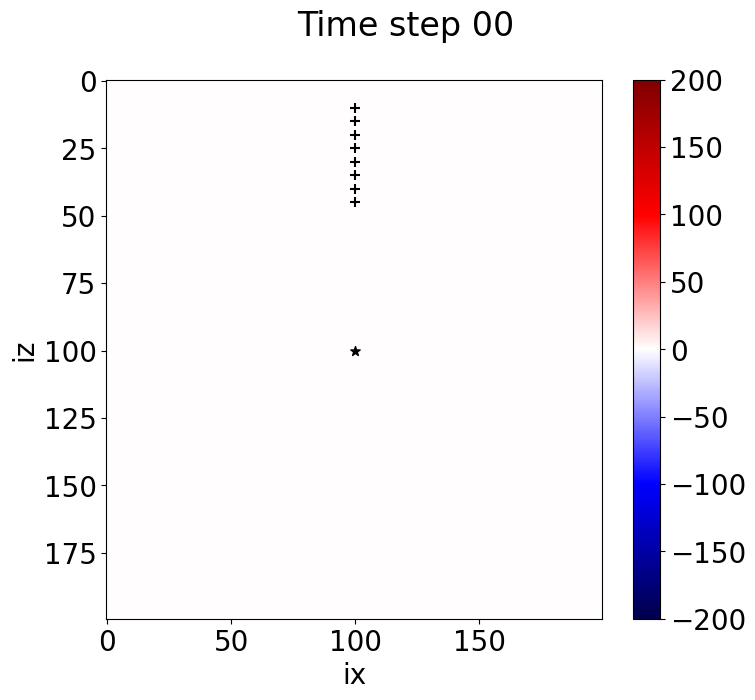

In [17]:
anim = animate(pnew, nx, nz, isx, isz, irx, irz, nt=nt, interval=100)
anim.save("ch_wash_owc.mp4")
Video("ch_wash_owc.mp4")